# Assignment 1 (Coding Part)

- Implement the required code for each problem in the allocated area.
- Write down your comments clearly.
- Please submit your notebook with outputs displayed.

- **Name: Norhan Reda**
- **Sec: 2**
- **BN: 31**

## Exercise 1.10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:



def flip_coin():
    # TODO: add fair coin flipping experiment code
      # return head or tail 1 is head, 0 is tail
     return random.choice([0, 1])

### Exercise 1.10 (a)

In [3]:
# TODO: add solution for point a
'''
the true probability of head is 0.5 because it is a fair coin that has equal prob for head and tail
so  
'''
μ_c1 = 0.5
μ_c_rand = 0.5
μ_c_min = 0.5

### Exercise 1.10 (b)

In [4]:
# TODO: add solution for point b
def entire_experiment(coins,flips):
  probs=[]
  for i in range(coins):
      prob=0
      for j in range(flips):
          prob+=flip_coin()
      probs.append(prob/flips)  
  v_1 = probs[0]
  v_rand = probs[np.random.randint(0,coins)]
  v_min =  probs[np.argmin(probs)]  

  return v_1,v_rand,v_min

v_1_list = []
v_rand_list = []
v_min_list = []

for k in range(100000):
  v_1,v_rand,v_min = entire_experiment(1000,10)
  v_1_list.append(v_1)
  v_rand_list.append(v_rand)
  v_min_list.append(v_min)
   

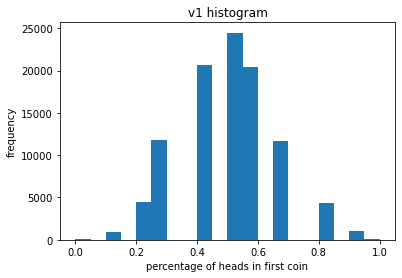

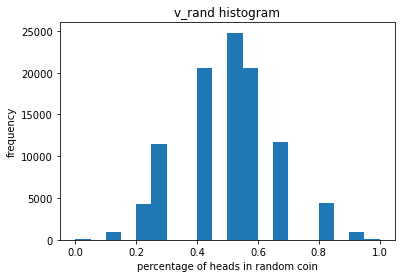

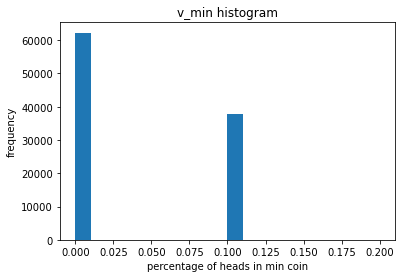

In [5]:
# v_1_list,v_rand_list,v_min_list =  entire_experiment(100000,1000,10)
# print(v_1_list)
# print(v_rand_list)
# print(v_min_list)

plt.hist(v_1_list, bins=20)
# put labels on the plot
plt.ylabel('frequency')
plt.xlabel('percentage of heads in first coin')
plt.title('v1 histogram') 
plt.show()

plt.hist(v_rand_list, bins=20)
plt.ylabel('frequency')
plt.xlabel('percentage of heads in random coin')
plt.title('v_rand histogram') 
plt.show()

plt.hist(v_min_list, bins=20)
plt.ylabel('frequency')
plt.xlabel('percentage of heads in min coin')
plt.title('v_min histogram') 
plt.show()

### Exercise 1.10 (c)

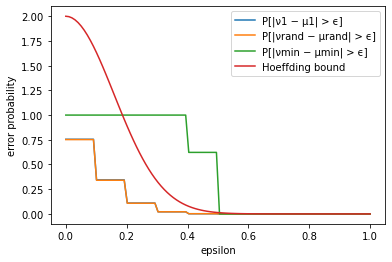

In [29]:
# TODO: add solution for point c
def Hoeffding_bound(epsilon,N):
    return 2* np.exp(-2*N*epsilon**2)


def prob(μ,v,epsilon):
    error_prop = (np.mean((np.abs(v - μ) > epsilon)))
    return error_prop

    

epsilons = np.linspace(0, 1, 100)

c_1_error_list = []
c_rand_error_list = []
c_min_error_list = []
hoeffding_bound_list = []
for epsilon in epsilons:
    c_1_error_list.append(prob(np.full(len(v_1_list),0.5 ) , v_1_list, epsilon))
    c_rand_error_list.append(prob(np.full(len(v_rand_list),0.5 ) , v_rand_list, epsilon))
    c_min_error_list.append(prob(np.full(len(v_min_list),0.5 ) , v_min_list, epsilon))
    hoeffding_bound_list.append(Hoeffding_bound(epsilon, 10))


plt.plot(epsilons, c_1_error_list, label="P[|ν1 − μ1| > ϵ]")
plt.plot(epsilons, c_rand_error_list, label="P[|νrand − μrand| > ϵ]")
plt.plot(epsilons, c_min_error_list, label="P[|νmin − μmin| > ϵ]")
plt.plot(epsilons, hoeffding_bound_list, label="Hoeffding bound")
plt.xlabel("epsilon")
plt.ylabel("error probability")
plt.legend()
plt.show()

### Exercise 1.10 (d)

In [30]:
# TODO: add solution for point d
'''
Hoeffdeing’s Inequality:

P[|ν − μ| > ϵ] <= 2𝑒**−2N𝜖**2
from the above graph the coins that obey the Hoeffding bound  is v1 and vrand (they are the same) and they are less than the Hoeffding bound 
and the one that doesn't obey is vmin 

vmin doesn't obey the Hoeffding bound  because coin vmin is calculated after flipping all coins so it is dependent on the training sample that 
we use so it violates the Hoeffding bound assumptions because is not random and not independent


'''


"\nHoeffdeing’s Inequality:\n\nP[|ν − μ| > ϵ] <= 2𝑒**−2N𝜖**2\nfrom the above graph the coins that obey the Hoeffding bound  is v1 and vrand  they are less than the Hoeffding bound \nand the one that doesn't obey is vmin \n\nvmin doesn't obey the Hoeffding bound  because coin vmin is calculated after flipping all coins so it is dependent on the training sample that \nwe use so it violates the Hoeffding bound assumptions because is not random and not independent\n\n\n"

### Exercise 1.10 (e)

In [8]:
# TODO: add solution for point e
'''
v1 and vrand are computed before knowing the whole dataset so they are independent on the dataset and they will still obey the Hoeffding bound
and for vmin it still has the broblem that it will not obey the Hoeffding bound because The problem is not with the number of bins but it with 
the fact that we are not choosing a bin randomly and we are violating the the Hoeffding bound assumptions

so increasing the number of bins will not change anything 

'''

## Problem 1.4

### Problem 1.4 (a)

In [9]:
def generate_dataset(n,d):
    # TODO: add dataset generation code
    weights =  np.random.uniform(-1, 1, (d+1))
    # weights = np.empty((d + 1))
    # weights[:d] = np.ones()
    # weights[d] = -0.25  # Adjusted index to access the last element
    x = np.empty((n, d+1))
    x[:, 0] = 1 # for the bias term 
    x[:, 1:] = np.random.uniform(-1, 1, (n, d))
    y=np.sign(np.dot(x,weights))
    return x, y,weights



print(generate_dataset(20,2))


(array([[ 1.        , -0.25015969,  0.09853268],
       [ 1.        ,  0.55470998,  0.16529007],
       [ 1.        , -0.26625999,  0.48076273],
       [ 1.        , -0.62151732,  0.38864327],
       [ 1.        , -0.76266654,  0.26604338],
       [ 1.        ,  0.71551926, -0.82254066],
       [ 1.        ,  0.90934288, -0.0012881 ],
       [ 1.        , -0.96066962, -0.88537445],
       [ 1.        ,  0.65199351, -0.83745795],
       [ 1.        ,  0.88471066, -0.85215913],
       [ 1.        , -0.87229337, -0.54191192],
       [ 1.        ,  0.0632783 , -0.93046546],
       [ 1.        , -0.0421357 , -0.42002159],
       [ 1.        ,  0.26638399, -0.47270406],
       [ 1.        ,  0.2262117 ,  0.56854575],
       [ 1.        , -0.58034595, -0.1148168 ],
       [ 1.        , -0.01629462, -0.47444245],
       [ 1.        ,  0.68428784,  0.86396517],
       [ 1.        , -0.5611095 , -0.24065721],
       [ 1.        , -0.88373188, -0.4264088 ]]), array([-1.,  1., -1., -1., -1.,  1., 

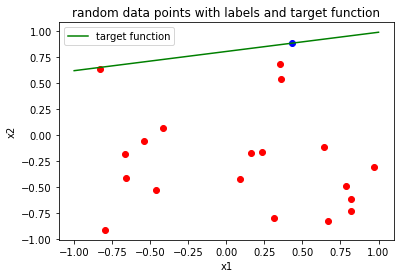

In [10]:
def plot_dataset(x, y,weightsi,weights=None,update=False): 
    for i in range(len(y)):
        if y[i] == 1:
            plt.plot(x[i,1], x[i,2], 'o',color='red')
        else:
            plt.plot(x[i,1], x[i,2], 'o',color='blue')
       
    # plot the target function f(x) 
    x11 = np.linspace(-1,1,100)
    x22 = (-x11*weightsi[1]-weightsi[0])/weightsi[2]
    plt.plot(x11, x22,color='green', label='target function')
    if(update):
     x1 = np.linspace(-1,1,100)
     x2 = (-x1*weights[1]-weights[0])/weights[2]
     plt.plot(x1,x2,color='yellow',label='perceptron line')
    # put legend on the plot
    plt.legend()
    # put labels on the plot
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('random data points with labels and target function')
    plt.show()    
    
x, y,wi = generate_dataset(20,2)
plot_dataset(x, y,wi)


### Problem 1.4 (b)

In [11]:
def run_perceptron_learning(x,y,d):
    # TODO: add perceptron learning algorithm code
    w =  np.zeros(shape=(d + 1,))
    num_of_updates = 0
    while True:
      m=0
      for i in range(len(y)):
         # print(y[i],x[i])
         if y[i]* np.dot(w.T,x[i]) <= 0 :
            w= w + y[i]*x[i]
            m=m+1
            num_of_updates +=1
      if  m == 0:
         break
      # print(w)
    return w,num_of_updates 
print(run_perceptron_learning(x,y,2))


(array([ 2.        , -1.07069368, -1.76898788]), 24)


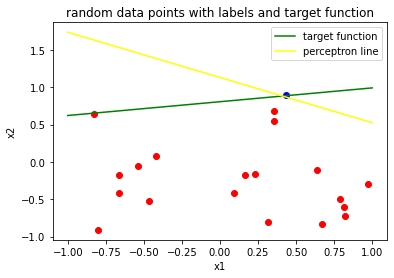

number of updates is:  24


In [12]:
# TODO: add solution for the rest of the point
w,updates=run_perceptron_learning(x,y,2)
plot_dataset(x, y,wi,w,True)
print("number of updates is: ",updates)

### Problem 1.4 (c)

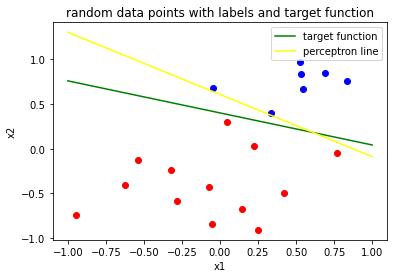

number of updates is:  9


In [13]:
# TODO: add solution for point c
x_20,y_20,wi=generate_dataset(20,2)
w,updates=run_perceptron_learning(x_20,y_20,2)
plot_dataset(x_20, y_20,wi,w,True)
print("number of updates is: ",updates)

### Problem 1.4 (d)

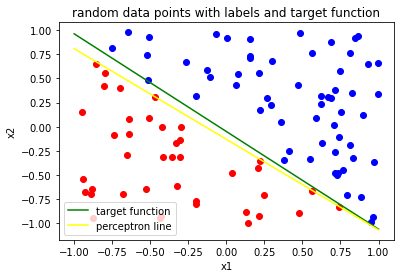

number of updates is:  151


In [14]:
# TODO: add solution for point d

x_100,y_100,wi=generate_dataset(100,2)
w,updates=run_perceptron_learning(x_100,y_100,2)
plot_dataset(x_100, y_100,wi,w,True)
print("number of updates is: ",updates)

### Problem 1.4 (e)

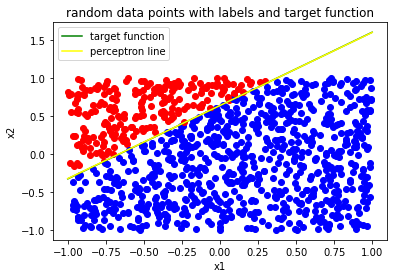

number of updates is:  274


In [15]:
# TODO: add solution for point e
x_1000,y_1000,wi=generate_dataset(1000,2)
w,updates=run_perceptron_learning(x_1000,y_1000,2)
plot_dataset(x_1000, y_1000,wi,w,True)
print("number of updates is: ",updates)


### Problem 1.4 (f)

In [16]:

x_1000_10,y_1000_10,wi=generate_dataset(1000,10)
w,updates=run_perceptron_learning(x_1000_10,y_1000_10,10)
# plot_dataset(x_1000_10, y_1000_10,wi,w,True)
print("number of updates is: ",updates)


number of updates is:  1646


### Problem 1.4 (g)

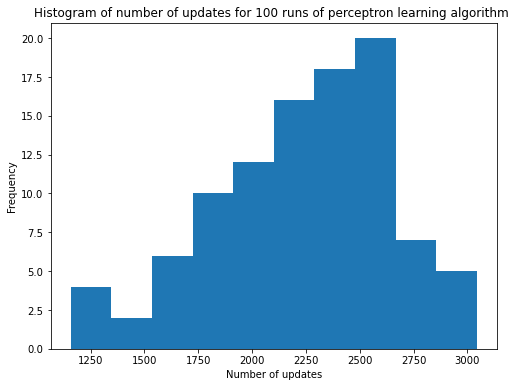

In [17]:
num_of_updates_list = []

for i in range(100):
    # random = np.random.permutation(len(y))
    # x_1000_10 = x_1000_10[random]
    # y_1000_10 = y_1000_10[random]
    data= list(zip(x_1000_10, y_1000_10))
    np.random.shuffle( data)
    x_1000_10, y_1000_10 = zip(*data)
    # print(x_1000_10)
    # print("///////")
    # print(np.array(y_1000_10))

    weights, num_of_updates = run_perceptron_learning( x_1000_10, np.array(y_1000_10),10)
    # print(str(i),": Number of updates until convergence: ", num_of_updates)
    num_of_updates_list.append(num_of_updates)

plt.figure(figsize=(8, 6))
plt.hist(num_of_updates_list, bins=10)
plt.xlabel('Number of updates')
plt.ylabel('Frequency')
plt.title('Histogram of number of updates for 100 runs of perceptron learning algorithm ')
plt.show()

### Problem 1.4 (h)

In [ ]:
'''
as N and d increases the number of iterations increases so the running time increases 
and increasing the dataset will increase the accuracy as the g function will approximate the target function f and will be closer to it 

and as the size of dataset increases the number of updates wil increase .
'''